# **Exploration of Raw Bank Data** 

### Dataset Source: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
dataset_path = "data/raw/bank-full.csv"

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Anchor Relative Dir

In [7]:
import os

# Move working directory to project root if executed inside notebooks/
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

print("Working directory:", os.getcwd())


Working directory: c:\Coding\pytorch\bank-marketing-ml


### Load In Dataset as a Pandas Dataframe

In [20]:
bank_df = pd.read_csv(dataset_path, sep=';')
# verify data loaded correctly
bank_df.head()
bank_df.info()
bank_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Take a 5% random sample

In [15]:
sample_df = bank_df.sample(frac=0.05, random_state=42)


### Explore Distributions of Target Class (Subscription to Term Deposit)

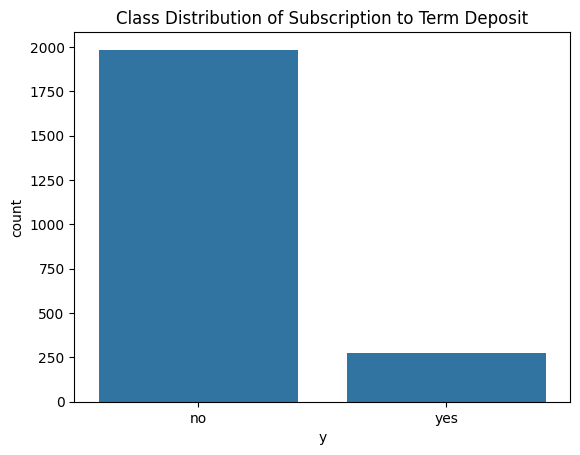

In [16]:
# Visualize class distribution
sns.countplot(x='y', data=sample_df)
plt.title('Class Distribution of Subscription to Term Deposit')
plt.show()


### Pairplot of Features

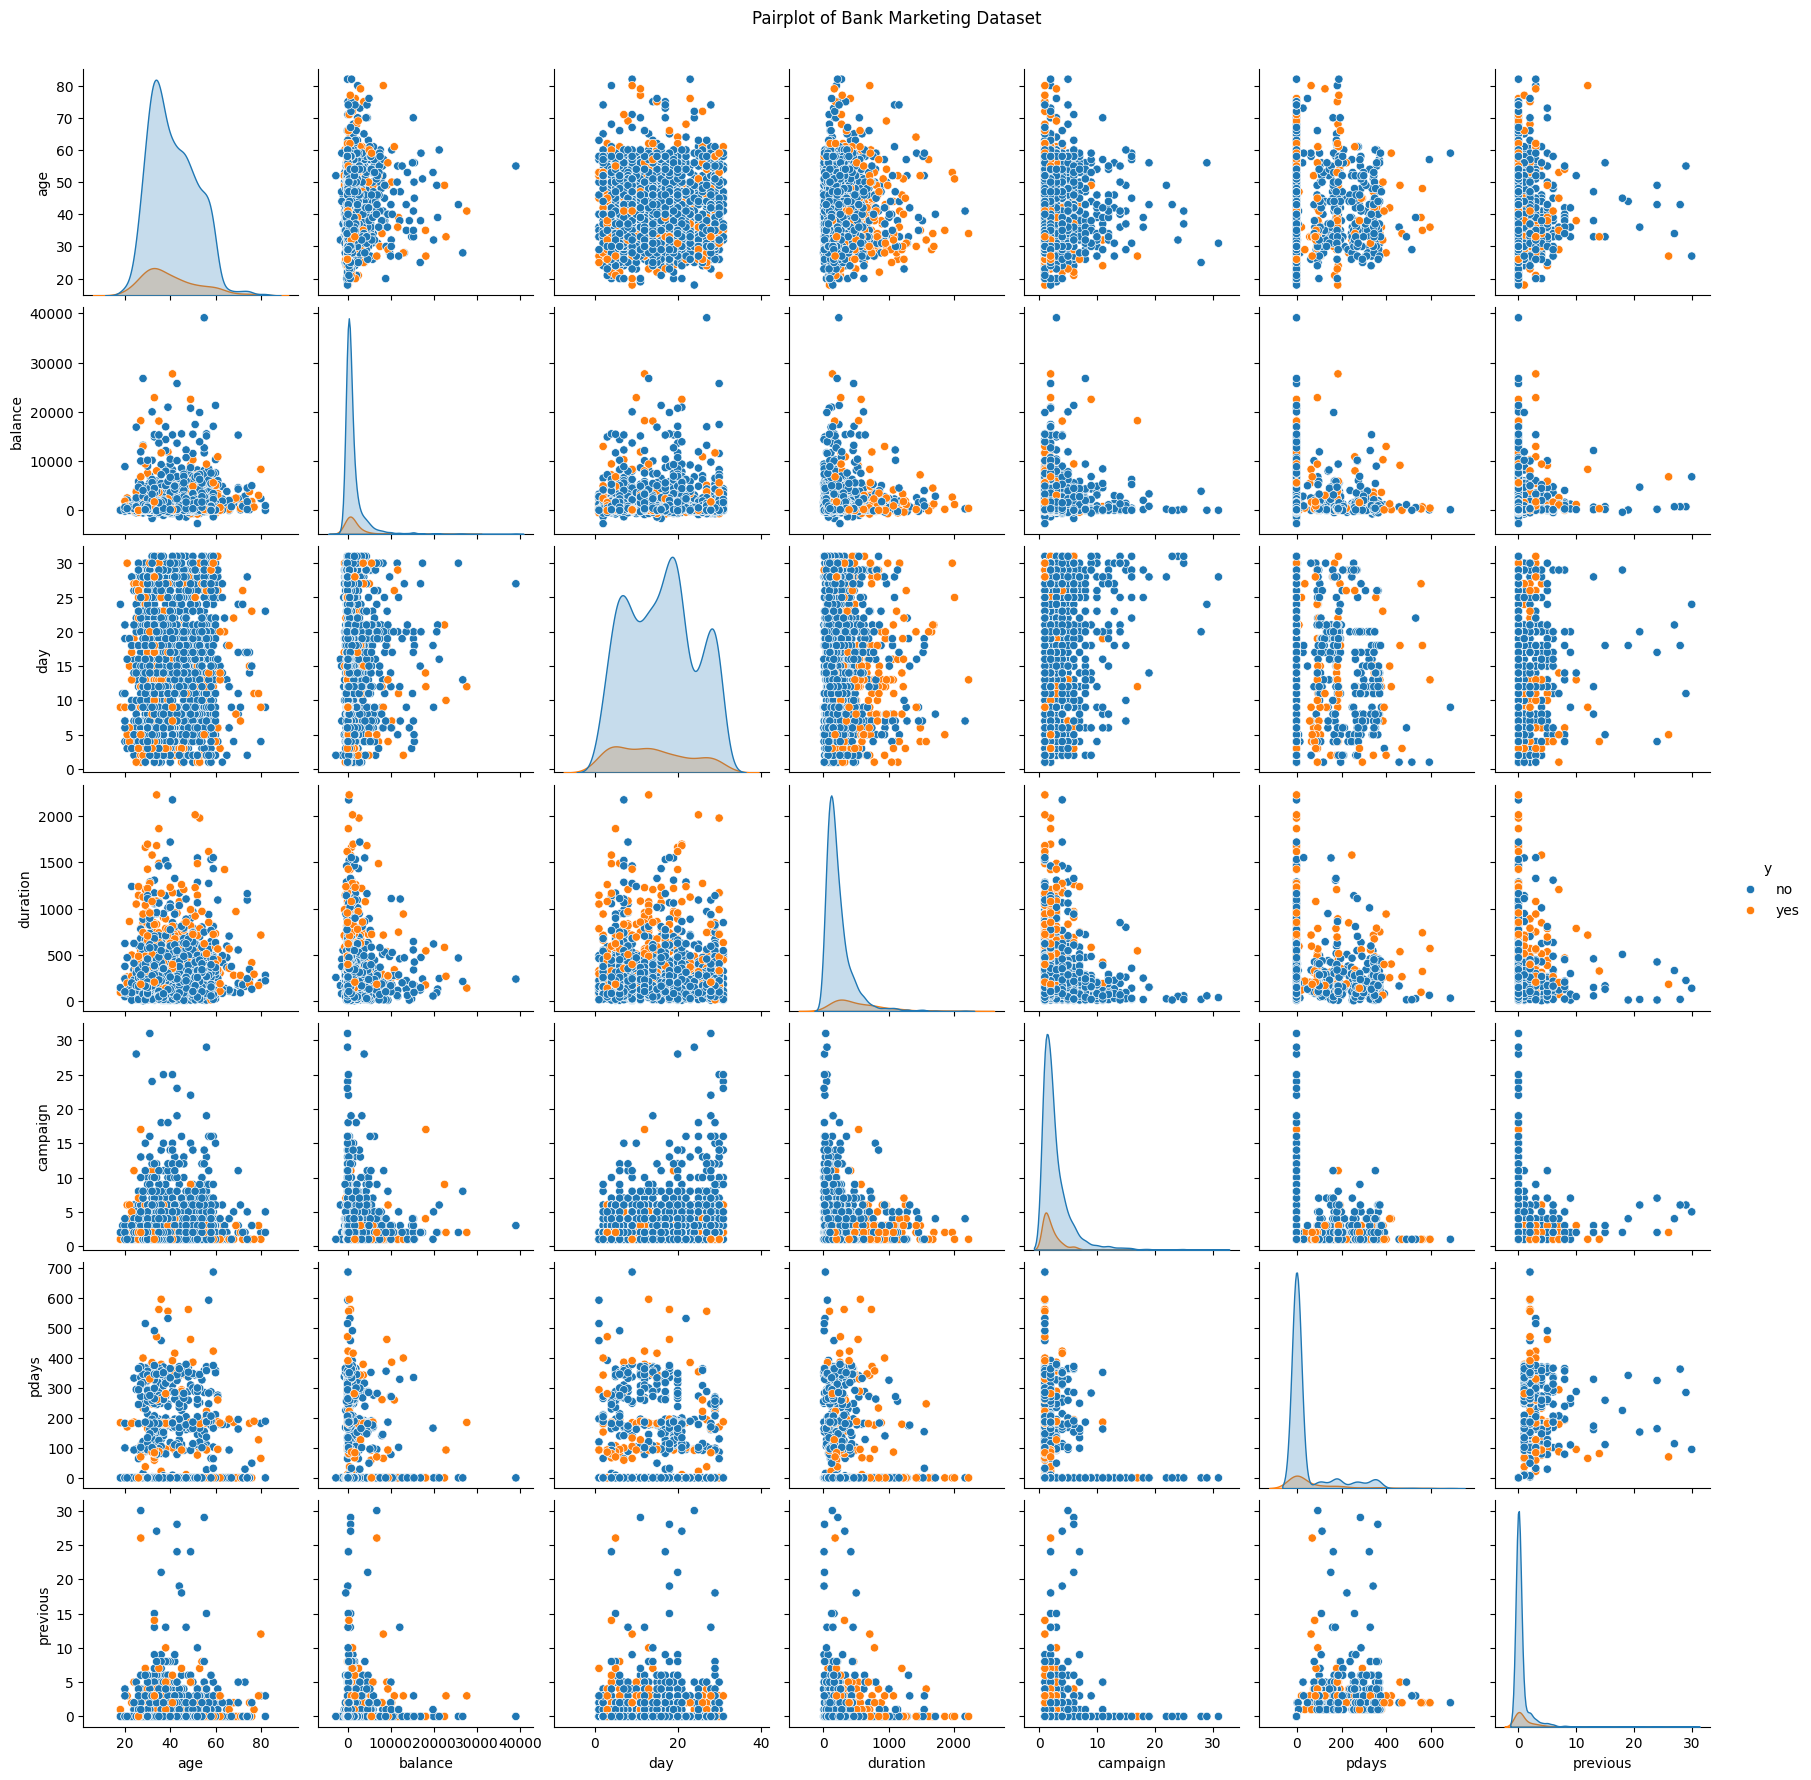

In [19]:
sns.pairplot(sample_df, hue='y')
plt.suptitle('Pairplot of Bank Marketing Dataset', y=1.02)
plt.show()

### Results
Duration looks like a promising feature, but it wouldn't be known until after a call, so it's would be like feature leakage.

### Distribution of Features

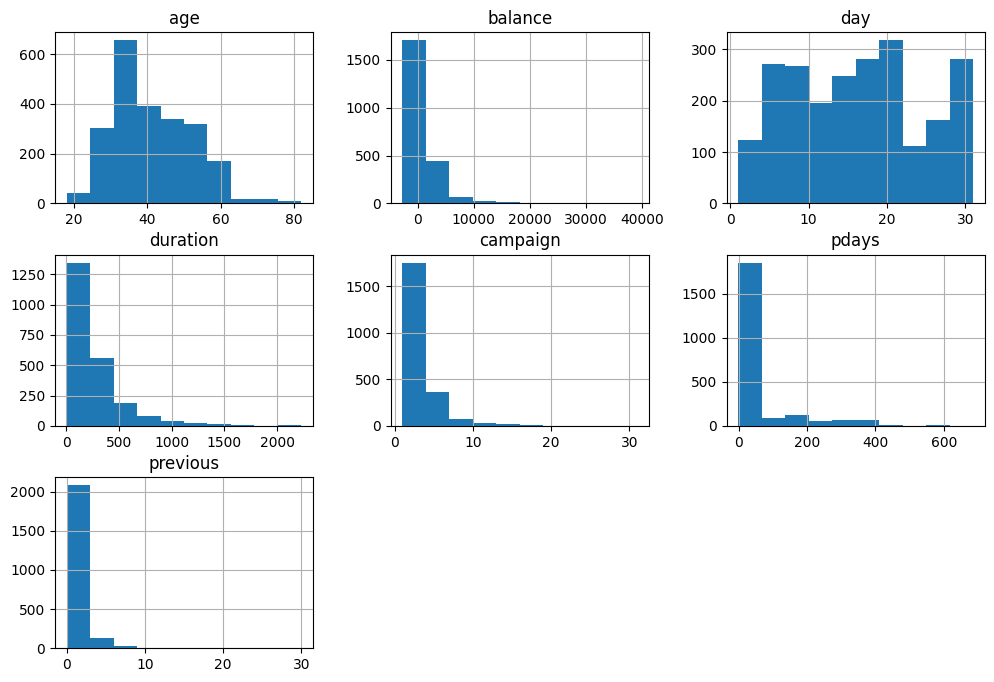

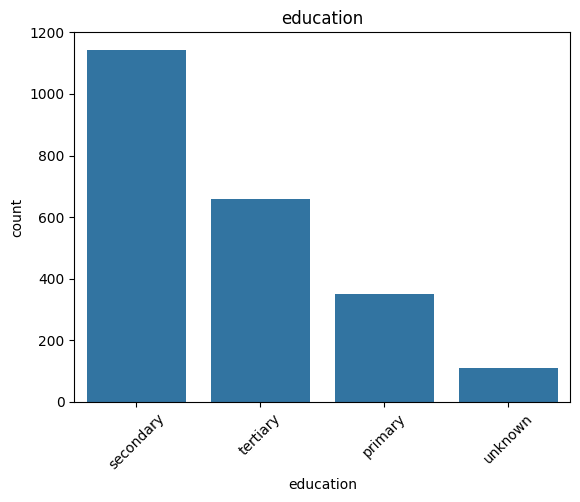

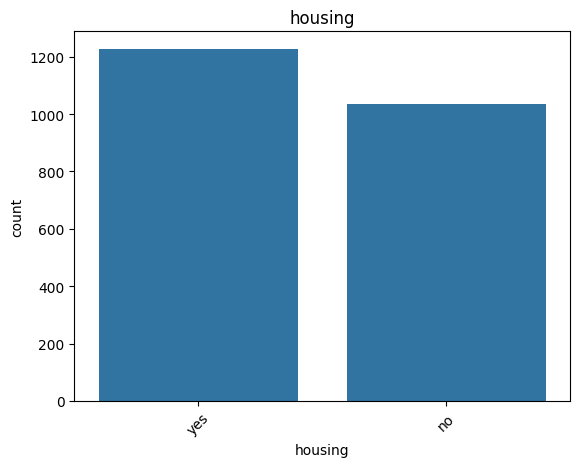

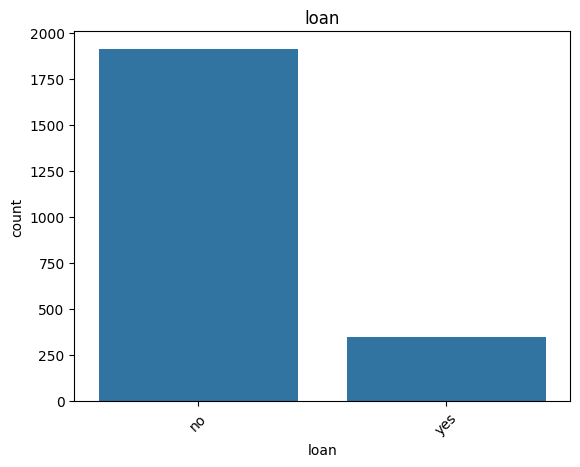

In [24]:
sample_df.hist(figsize=(12, 8))
for col in ['marital', 'education', 'housing', 'loan']:
    sns.countplot(x=sample_df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()



<Axes: >

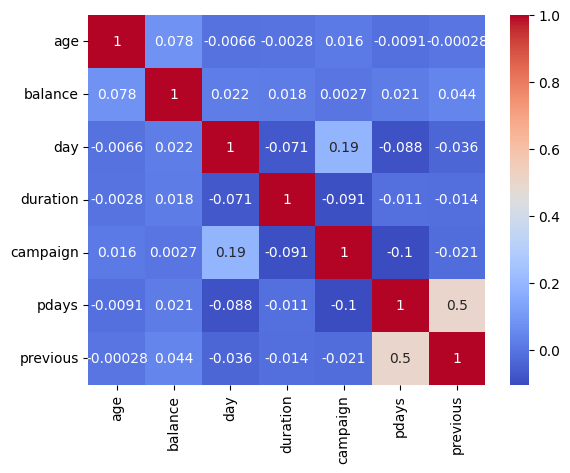

In [25]:
import numpy as np
sns.heatmap(sample_df.corr(numeric_only=True), annot=True, cmap='coolwarm')


# Analysis
Exploratory analysis of the Bank Marketing dataset shows that no individual feature exhibits strong predictive power. Pairwise correlations between variables are uniformly low, and most distributions overlap heavily across the target classes. This indicates that the dataset does not contain simple linear or single-feature separators; instead, the meaningful signal is distributed weakly across many inputs. Although low pairwise correlation might initially suggest that Naive Bayes could be appropriate, its conditional independence assumption is far stronger and is clearly violated in this behavior-driven, multivariable dataset where features interact through underlying demographic and campaign-related patterns. Logistic Regression aligns better with the observed structure because there is no significant multicollinearity, but its performance is naturally limited by the weak marginal signals and the strong imbalance toward the “no” class. These characteristics imply that models capable of learning interactions or nonlinear relationships—such as decision trees or neural networks—may be able to extract more of the underlying structure than strictly linear methods. Overall, the EDA suggests that the classification task relies on combining many subtle features rather than depending on any dominant predictor.

# Moving Forward
I will begin preprocessing and baseline models to further test this multivariable and nonlinear assumption.
*PREPROCESS*
    1. encode object variables
    2. 